In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
#Loading the dataset from train.CSV file

train = pd.read_csv('train.csv')

# Data Summary

In [ ]:
#Glance at Data - shape and basic info

In [3]:
train.shape

(10859, 59)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10859 entries, 0 to 10858
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10859 non-null  int64  
 1   target          10859 non-null  int64  
 2   ps_ind_01       10859 non-null  int64  
 3   ps_ind_02_cat   10859 non-null  int64  
 4   ps_ind_03       10859 non-null  int64  
 5   ps_ind_04_cat   10859 non-null  int64  
 6   ps_ind_05_cat   10859 non-null  int64  
 7   ps_ind_06_bin   10859 non-null  int64  
 8   ps_ind_07_bin   10859 non-null  int64  
 9   ps_ind_08_bin   10859 non-null  int64  
 10  ps_ind_09_bin   10859 non-null  int64  
 11  ps_ind_10_bin   10859 non-null  int64  
 12  ps_ind_11_bin   10859 non-null  int64  
 13  ps_ind_12_bin   10859 non-null  int64  
 14  ps_ind_13_bin   10859 non-null  int64  
 15  ps_ind_14       10859 non-null  int64  
 16  ps_ind_15       10859 non-null  int64  
 17  ps_ind_16_bin   10859 non-null 

# MetaData DataFrame for Reference

In [5]:
#Creating Metadata DataFrame so that it will be easy to handle and manipulate data during data exploration steps

#role: input, ID, target
#level: nominal, interval, ordinal, binary
#keep: True or False
#dtype: int, float, str

MetaData = pd.DataFrame(columns=['variable','role', 'level', 'keep', 'dtype'])
data =[]
for columns in train.columns:

    #Defining Role

    if columns == 'id':
        role = 'id'
    elif columns == 'target':
        role = 'target'
    else:
        role = 'input'

    #Defining DataTypes

    dtype = train[columns].dtype

    #Defining keep

    keep = True

    #Defining Level

    if columns[-3:] == 'bin' or columns == 'target':
        level = 'binary'
    elif columns[-3:] == 'cat' or columns == 'id':
        level = 'categorical'
    elif train[columns].dtype == float:
        level = 'interval'
    elif train[columns].dtype == np.int64:
        level = 'ordinal'


    f_dict = {
        'variable' : columns,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }

    data.append(f_dict)

MetaData = MetaData.append(data)

print(MetaData)

          variable    role        level  keep    dtype
0               id      id  categorical  True    int64
1           target  target       binary  True    int64
2        ps_ind_01   input      ordinal  True    int64
3    ps_ind_02_cat   input  categorical  True    int64
4        ps_ind_03   input      ordinal  True    int64
5    ps_ind_04_cat   input  categorical  True    int64
6    ps_ind_05_cat   input  categorical  True    int64
7    ps_ind_06_bin   input       binary  True    int64
8    ps_ind_07_bin   input       binary  True    int64
9    ps_ind_08_bin   input       binary  True    int64
10   ps_ind_09_bin   input       binary  True    int64
11   ps_ind_10_bin   input       binary  True    int64
12   ps_ind_11_bin   input       binary  True    int64
13   ps_ind_12_bin   input       binary  True    int64
14   ps_ind_13_bin   input       binary  True    int64
15       ps_ind_14   input      ordinal  True    int64
16       ps_ind_15   input      ordinal  True    int64
17   ps_in

<ipython-input-5-b0c251b7ce64>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MetaData = MetaData.append(data)


In [6]:
#Distribution of variables across levels

MetaData.groupby('level')[['variable']].count()

,variable
level,
binary,18
categorical,15
interval,17
ordinal,9


### Data Exploration

# Descriptive statistics

In [7]:
#Interval Variables

v = MetaData[(MetaData.level == 'interval') & (MetaData.keep)]['variable'].tolist()
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10858.000000,10858.000000,10858.00000,10858.000000,10858.000000,10858.000000,10858.000000
mean,0.613500,0.442499,0.555581,0.379439,0.811721,0.277745,3.060913,0.450833,0.454517,0.450557,9.219285,2.346104,8.40081,5.460766,1.442439,2.874931,7.541905
std,0.287208,0.407303,0.793327,0.059434,0.226135,0.354266,0.745836,0.287830,0.285746,0.288741,1.463217,1.258272,2.86688,2.327156,1.200708,1.682284,2.761054
min,0.000000,0.000000,-1.000000,0.141421,0.313241,-1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.524702,0.316228,0.669155,0.332415,2.828427,0.200000,0.200000,0.200000,8.000000,1.000000,6.00000,4.000000,1.000000,2.000000,6.000000
50%,0.700000,0.300000,0.721110,0.374166,0.764610,0.368782,3.316625,0.500000,0.500000,0.500000,9.000000,2.000000,8.00000,5.000000,1.000000,3.000000,7.000000
75%,0.900000,0.600000,1.005298,0.400000,0.903586,0.396485,3.605551,0.700000,0.700000,0.700000,10.000000,3.000000,10.00000,7.000000,2.000000,4.000000,9.000000
max,0.900000,1.800000,2.863564,1.264911,2.707275,0.575326,3.741657,0.900000,0.900000,0.900000,12.000000,7.000000,21.00000,16.000000,8.000000,10.000000,20.000000


In [8]:
#Ordinal Variables

v = MetaData[(MetaData.level == 'ordinal') & (MetaData.keep)]['variable'].tolist()
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07
count,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000
mean,1.907174,4.407680,0.012248,7.347638,2.352611,2.363201,1.880284,7.706050,3.012340
std,1.984988,2.694663,0.131364,3.546168,0.828599,1.109394,1.144085,1.333976,1.403898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000
max,7.000000,11.000000,3.000000,13.000000,3.000000,5.000000,6.000000,10.000000,8.000000


In [9]:
#Binary Variables

v = MetaData[(MetaData.level == 'binary') & (MetaData.keep)]['variable'].tolist()
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000
mean,0.037941,0.395432,0.253154,0.161433,0.189981,0.000553,0.001750,0.009117,0.000829,0.661111,0.122755,0.148264,0.125253,0.619819,0.555996,0.297384,0.358906,0.155554
std,0.191062,0.488966,0.434838,0.367947,0.392304,0.023501,0.041795,0.095050,0.028778,0.473354,0.328171,0.355378,0.331021,0.485453,0.496877,0.457128,0.479702,0.362448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation between Variables

In [10]:
#Creating list of variables based on the levels

for variable in MetaData.variable:
    IntervalVar = MetaData[MetaData.level=='interval']['variable']
    CategoricalVar = MetaData[MetaData.level=='categorical']['variable']
    BinaryVar = MetaData[MetaData.level=='binary']['variable']
    OrdinalVar = MetaData[MetaData.level=='ordinal']['variable']


<Axes: >

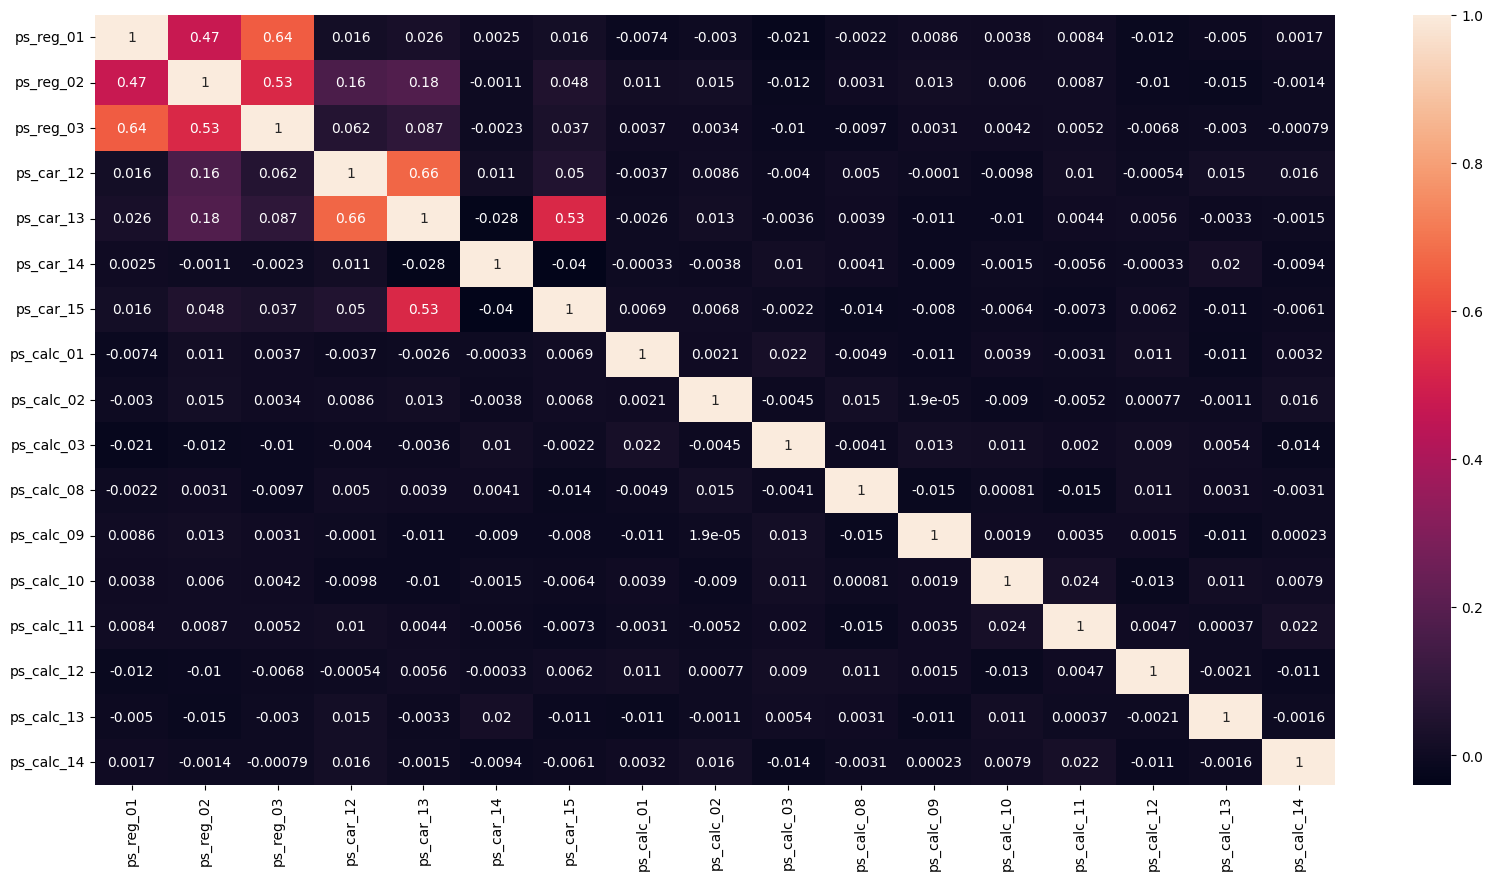

In [11]:
#Correlation Heatmap of the interval variables

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train[IntervalVar].corr(), annot=True)

<Axes: >

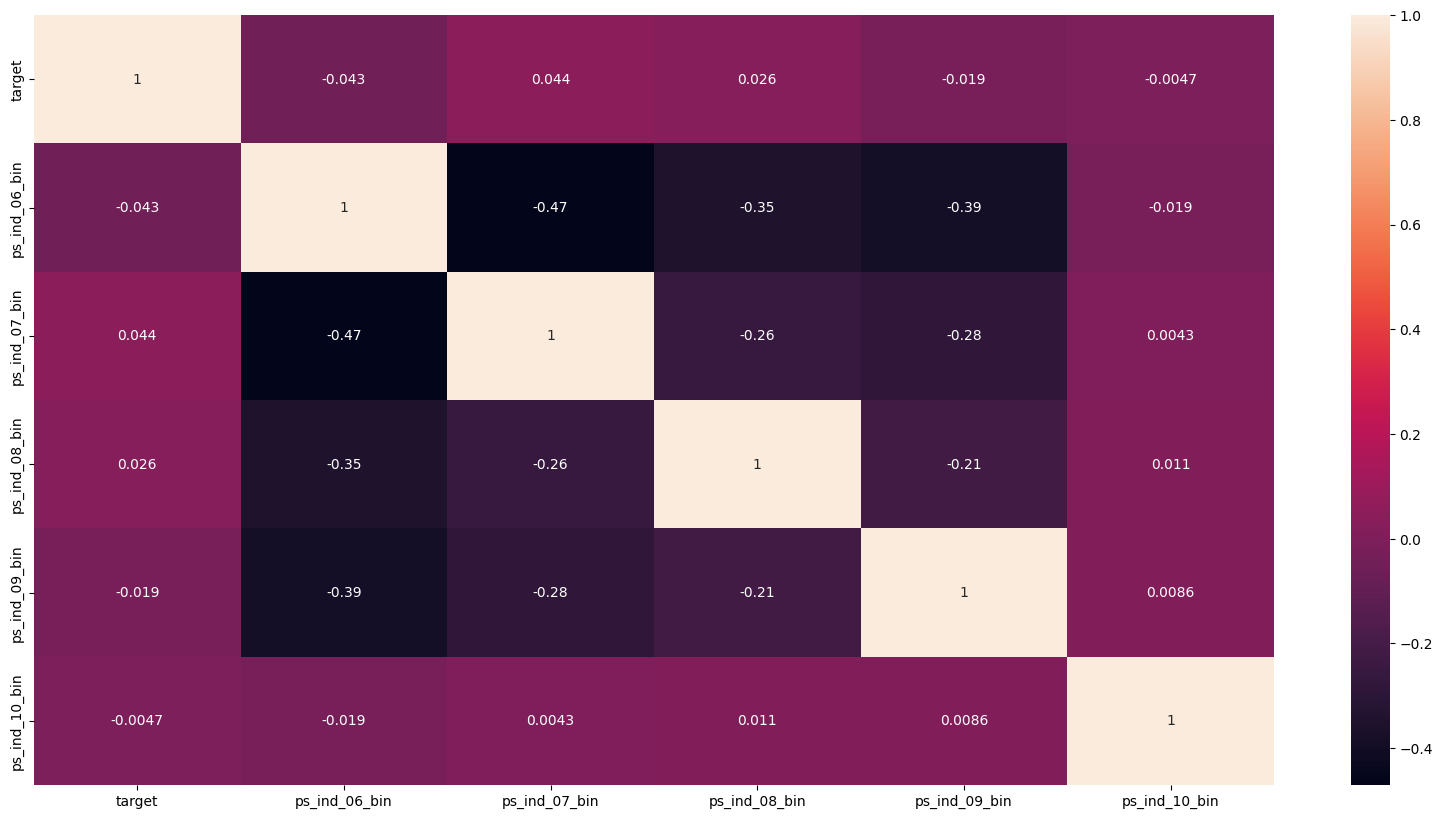

In [12]:
#Zoomed Correlation Heatmap of 'ind' variables

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train.loc[:, ["target", "ps_ind_06_bin","ps_ind_07_bin", "ps_ind_08_bin", "ps_ind_09_bin","ps_ind_10_bin"] ].corr(), annot=True)

<Axes: >

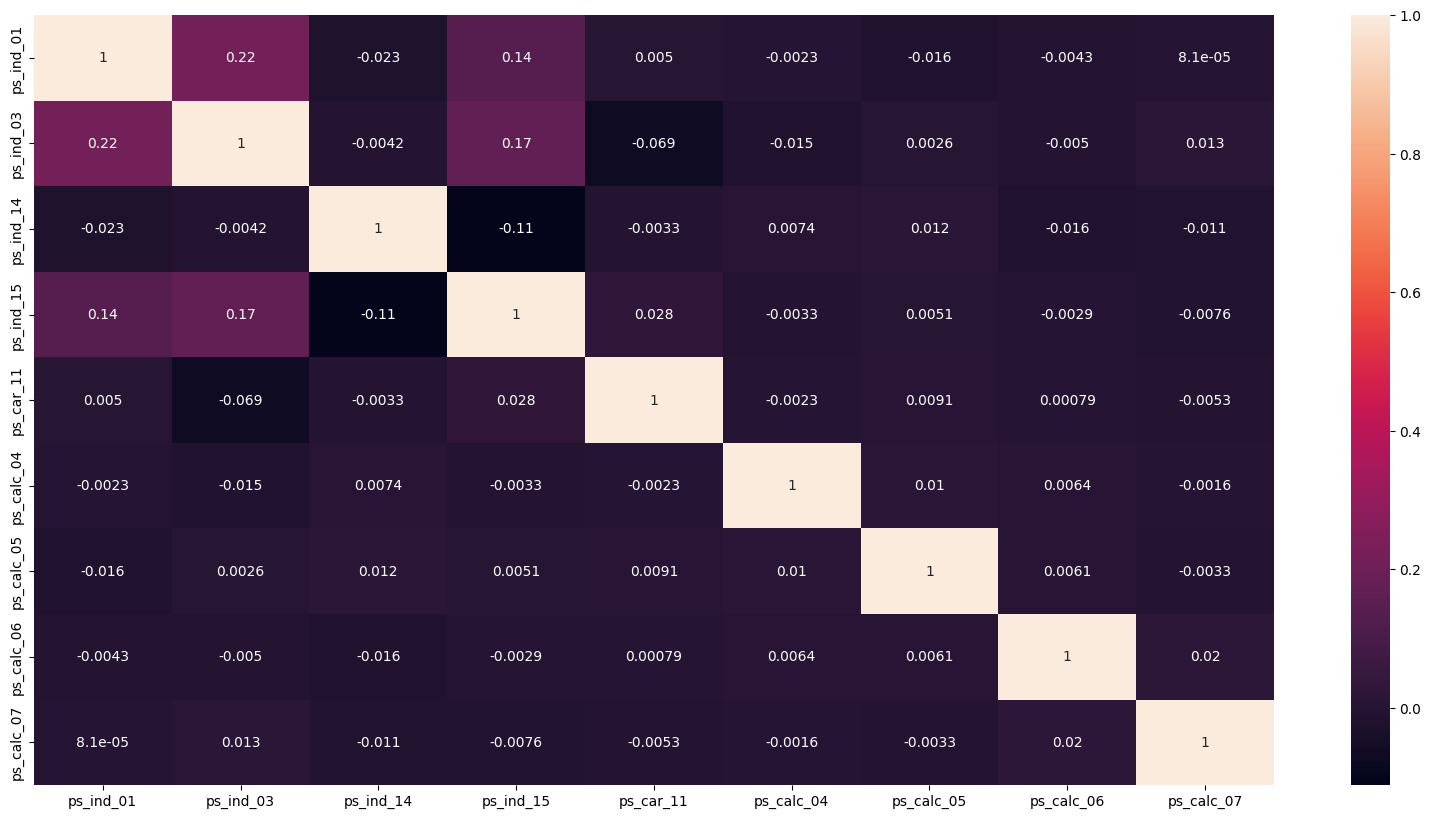

In [13]:
#Correlation Heatmap of Ordinal variables

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train[OrdinalVar].corr(), annot=True)

<Axes: >

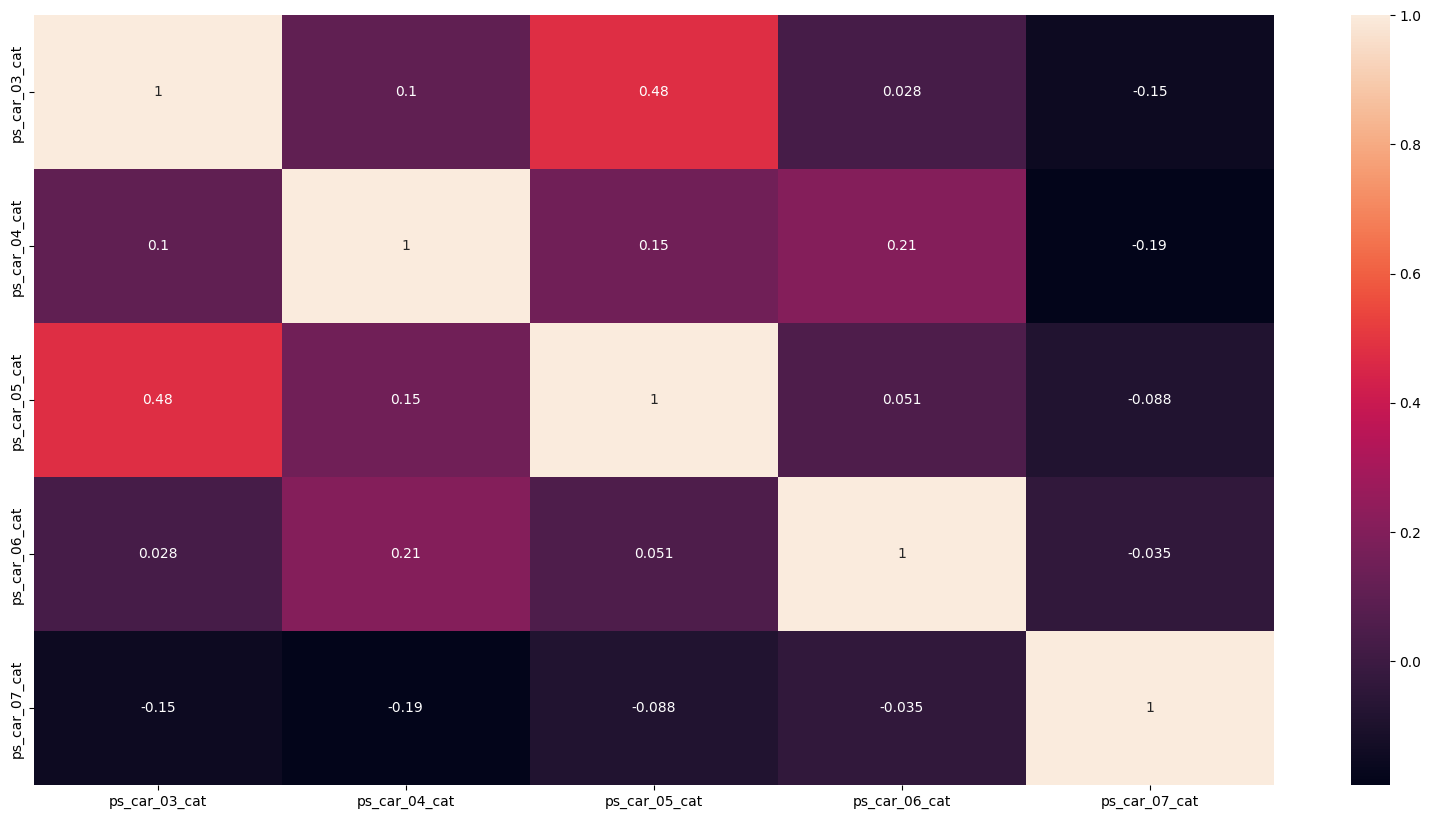

In [14]:
#Zoomed Heatmap of 'car' categorical variables

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train.loc[:, ["ps_car_03_cat","ps_car_04_cat","ps_car_05_cat","ps_car_06_cat","ps_car_07_cat"]].corr(), annot=True)

In [ ]:
#Findings:

#Interval variables: we can see some of the variables are highly correlated like - ps_reg_01, ps_reg_02, ps_reg_03
#ps_ind_06_bin and ps_ind_07_bin are significantly correlated in 'ind' variables
#Very few ordinal variables are correlated to each other
#ps_car_03_cat and ps_cat_05_cat are significantly correlated in 'car' categorical variables

In [15]:
s = train.sample(frac=0.1)


ps_reg_02 and ps_reg_03 As the regression line shows, there is a linear relationship between these variables. Thanks to the hue parameter we can see that the regression lines for target=0 and target=1 are the same.



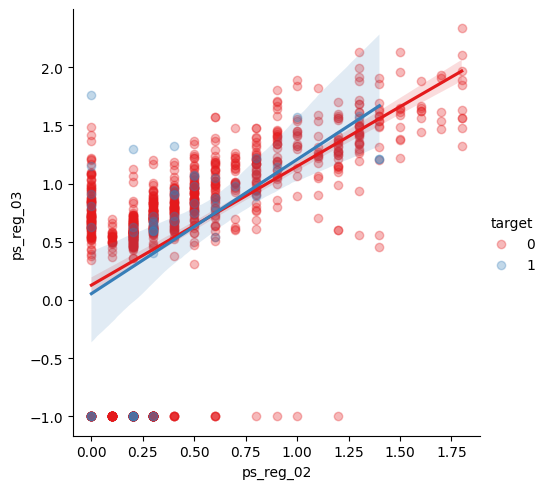

In [16]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

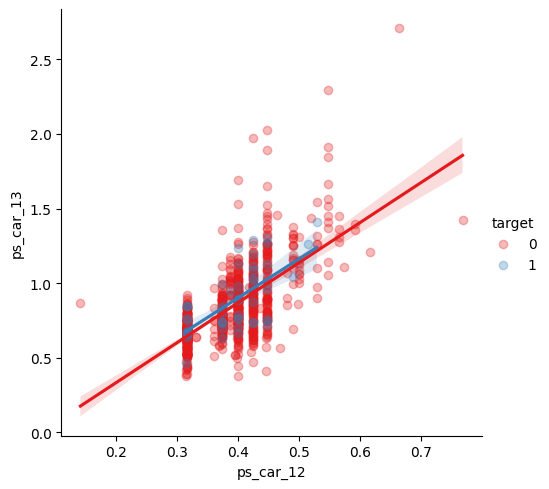

In [17]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

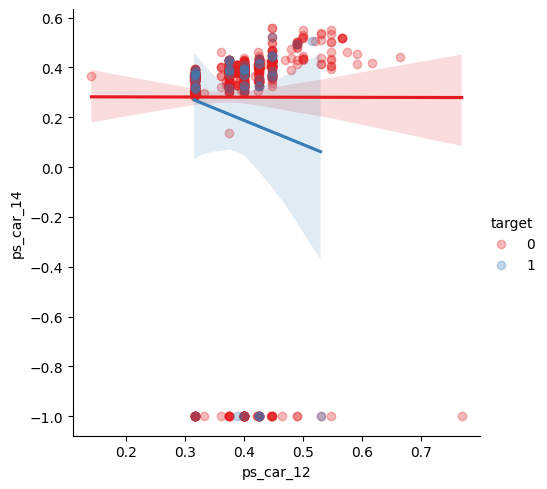

In [18]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

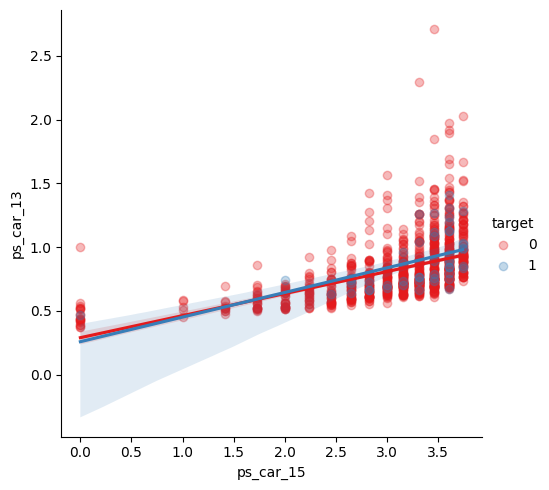

In [19]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

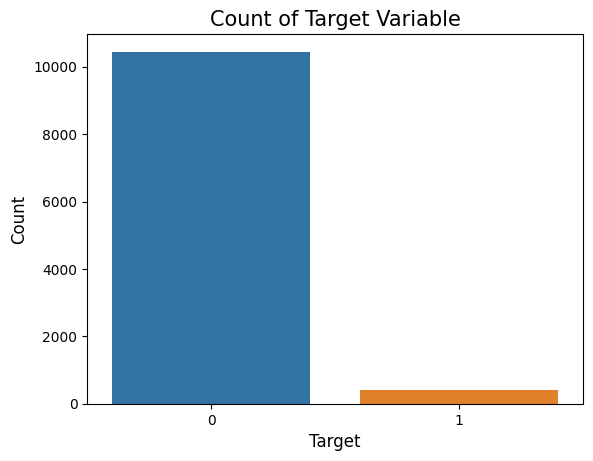

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame containing the dataset

# Create a count plot of the target variable
sns.countplot(data=train, x='target')

plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Target Variable', fontsize=15)
plt.show()


In [ ]:
#Finding:

#Data is highly imbalance with only ~3% of data belongs to minority class
#Need to do upscaling/downsampling of data to get the desired results

# Cardinality check for categorical variables

In [21]:
#Checking the cardinality of each categorical variable

v = MetaData[(MetaData.level == 'categorical') & (MetaData.keep)].index

for f in v:
    dist_values = train.iloc[:,f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable 0 has 10859 distinct values
Variable 3 has 5 distinct values
Variable 5 has 3 distinct values
Variable 6 has 8 distinct values
Variable 23 has 13 distinct values
Variable 24 has 2 distinct values
Variable 25 has 3 distinct values
Variable 26 has 10 distinct values
Variable 27 has 3 distinct values
Variable 28 has 18 distinct values
Variable 29 has 3 distinct values
Variable 30 has 2 distinct values
Variable 31 has 6 distinct values
Variable 32 has 3 distinct values
Variable 33 has 104 distinct values


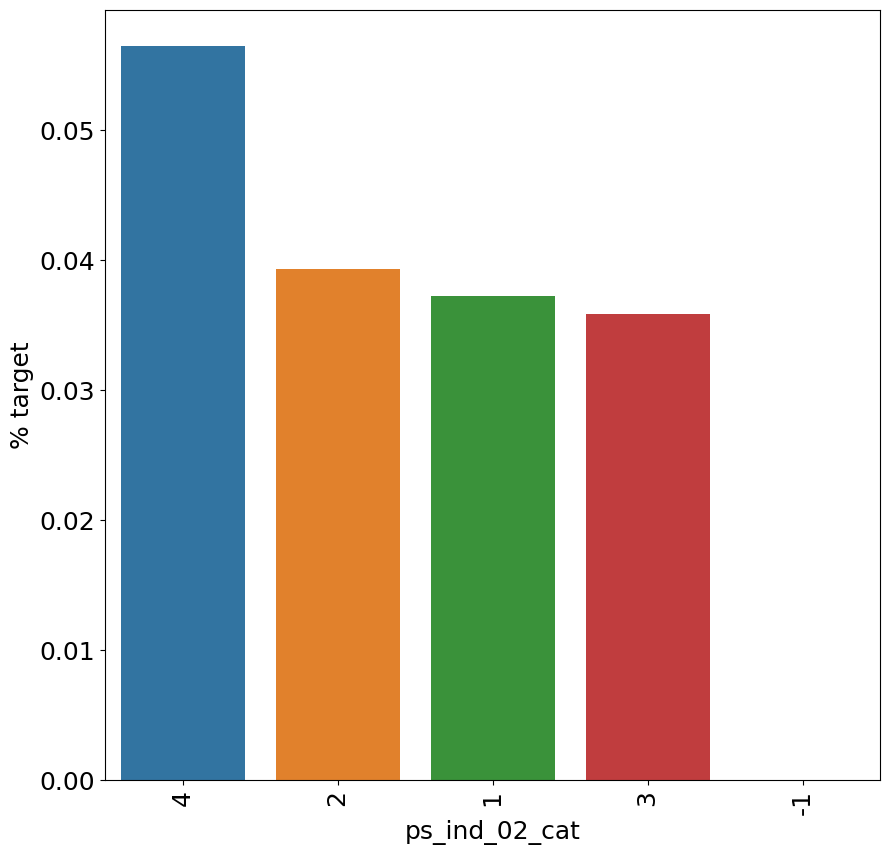

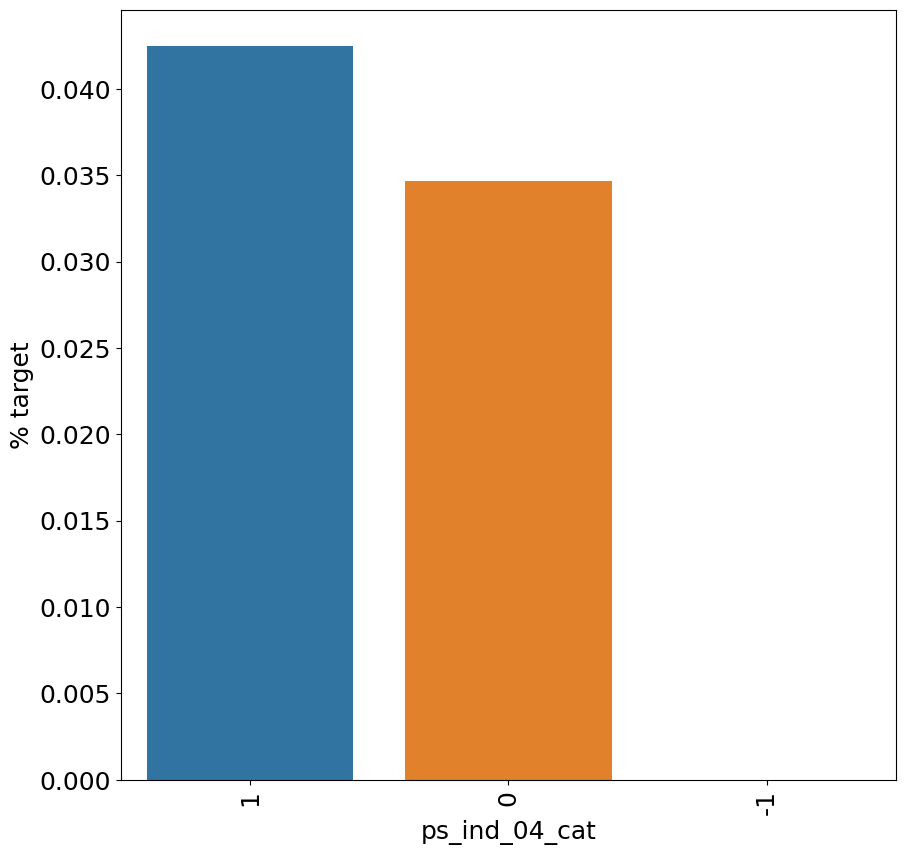

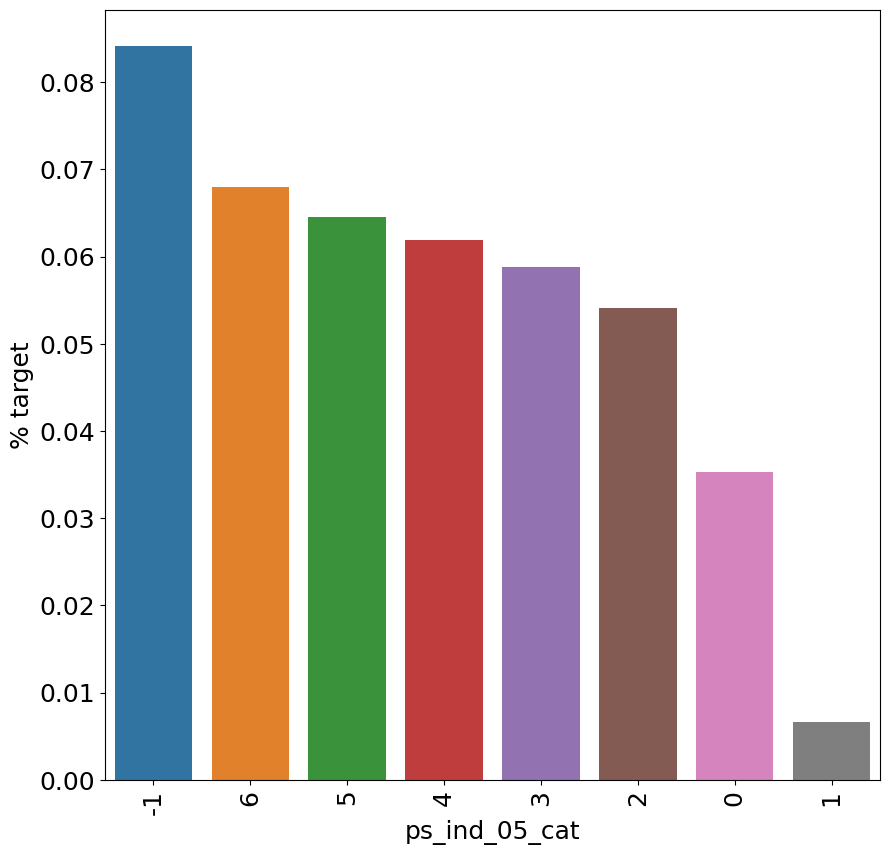

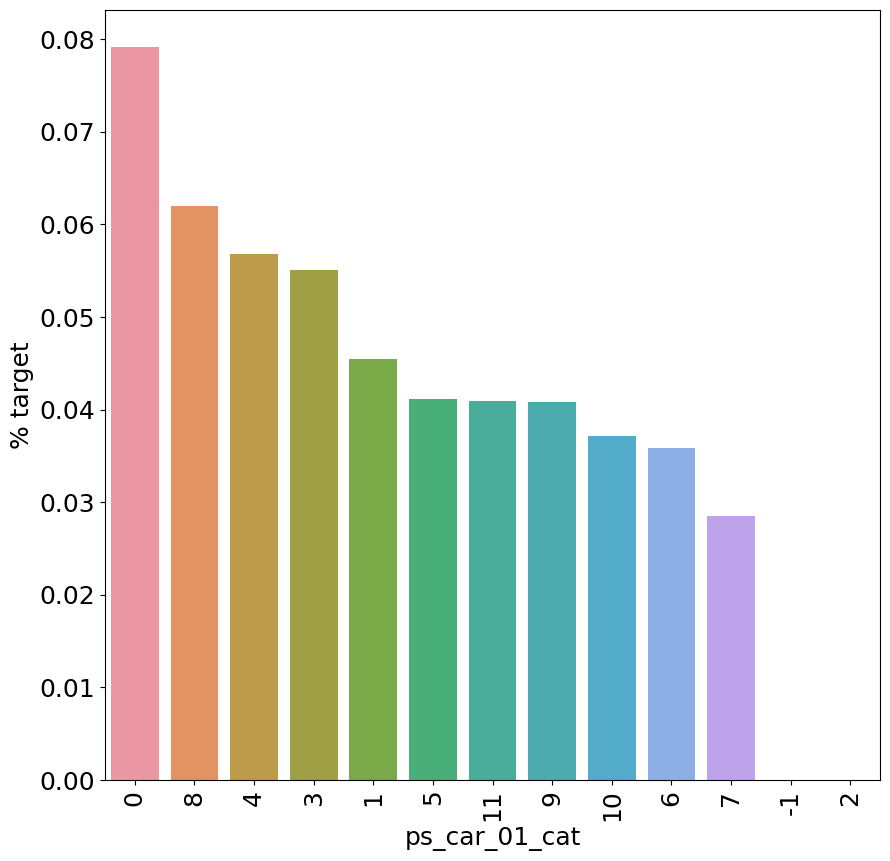

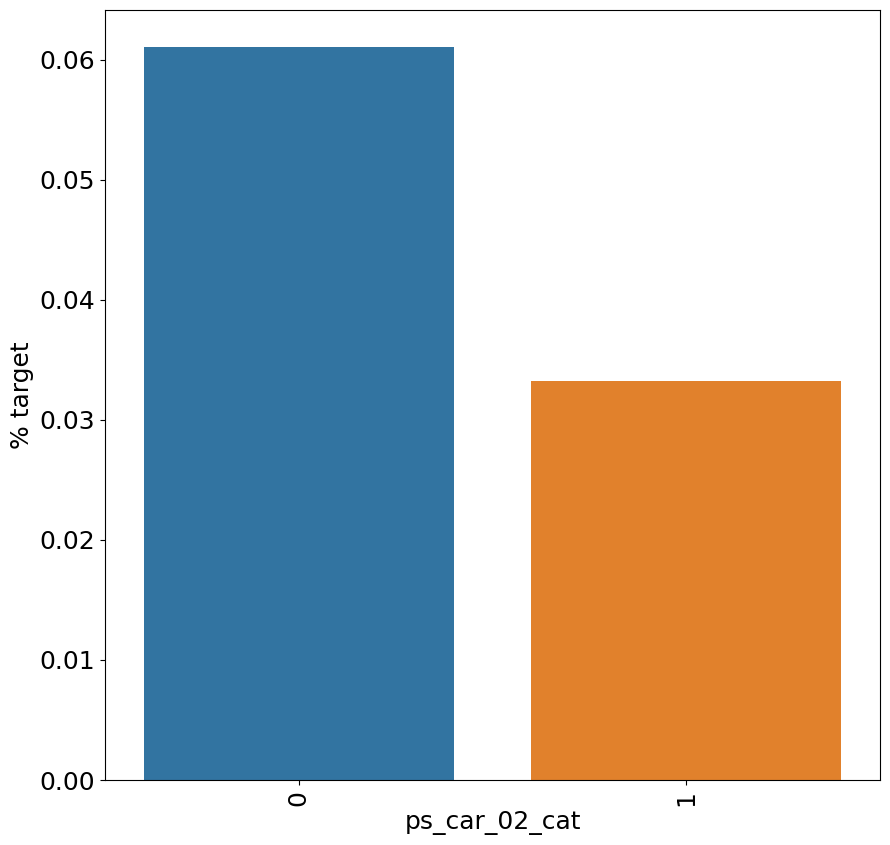

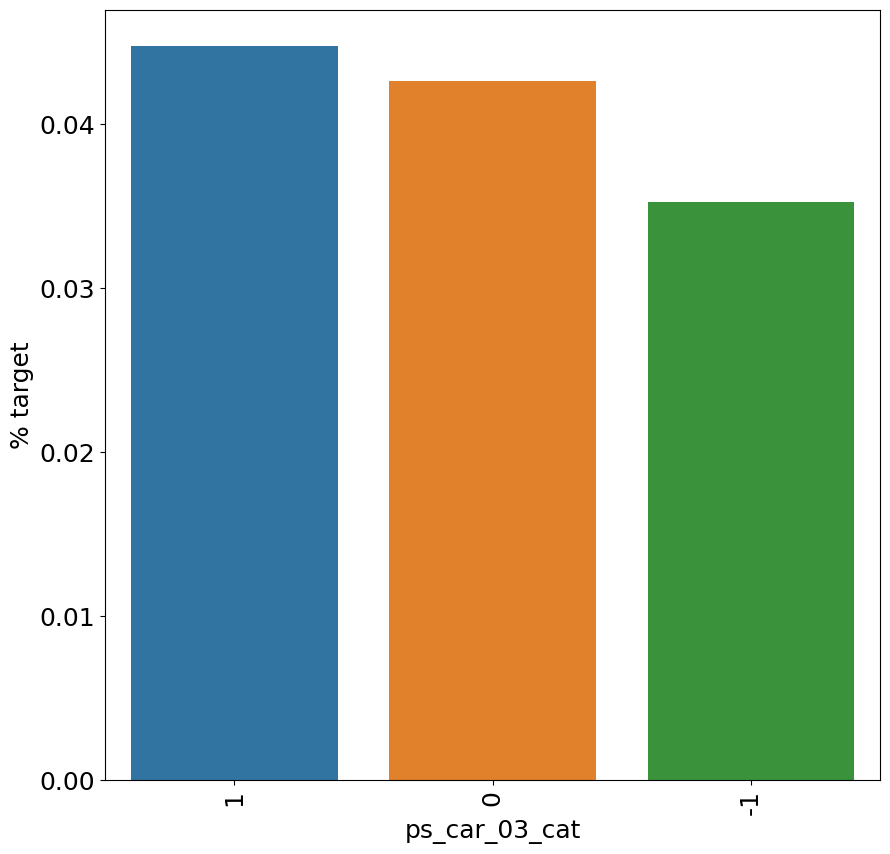

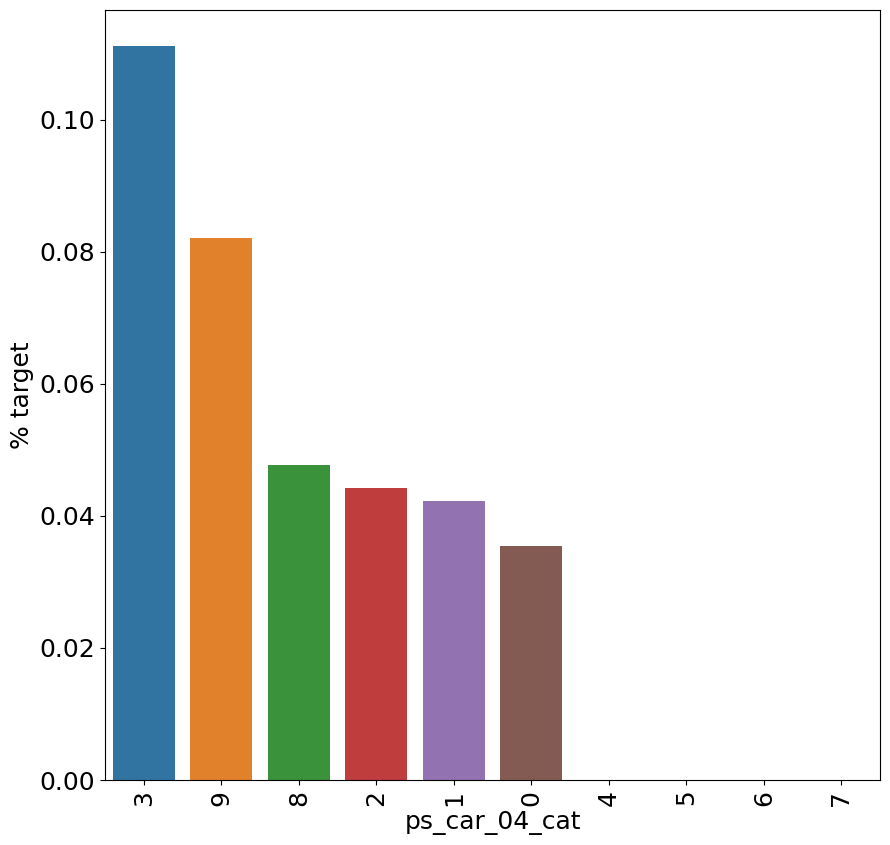

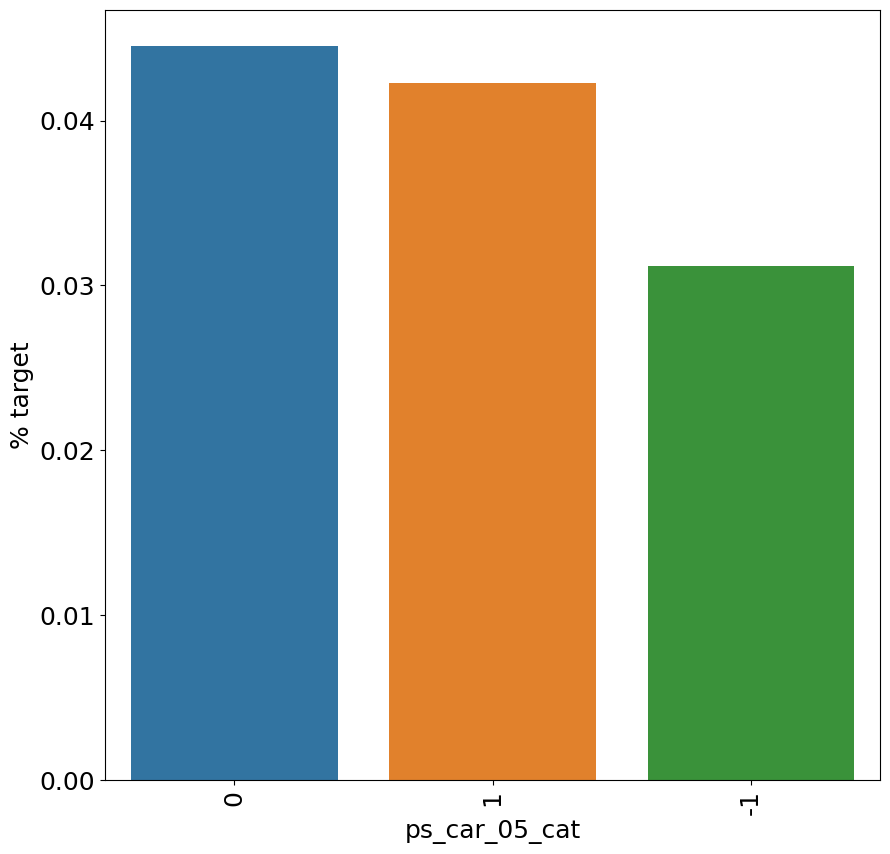

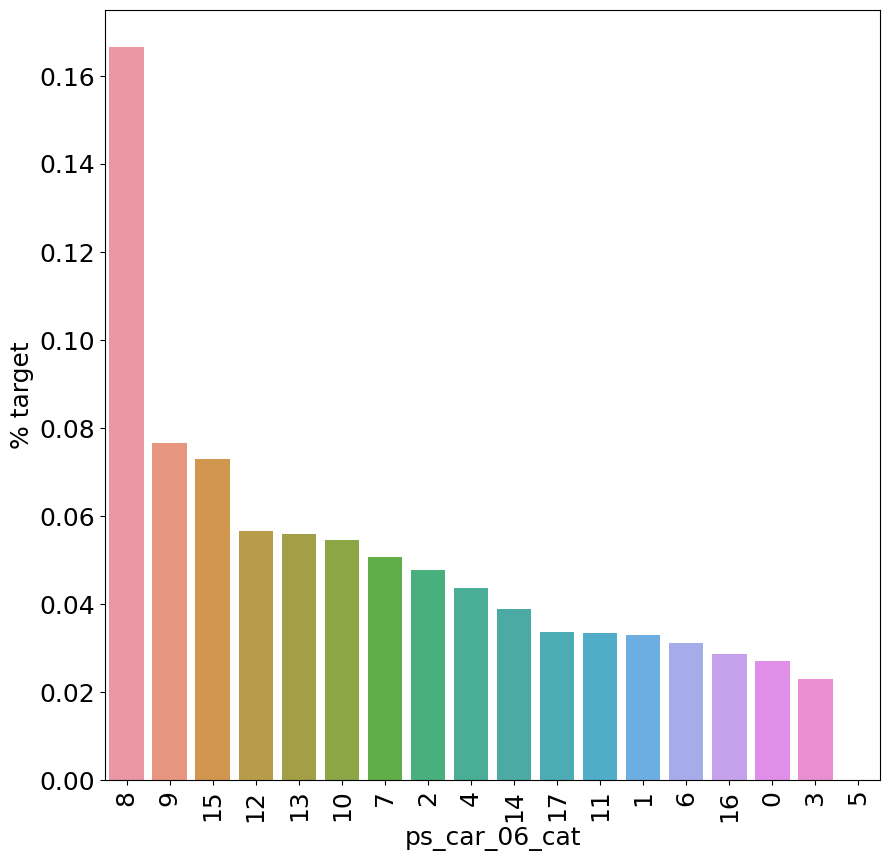

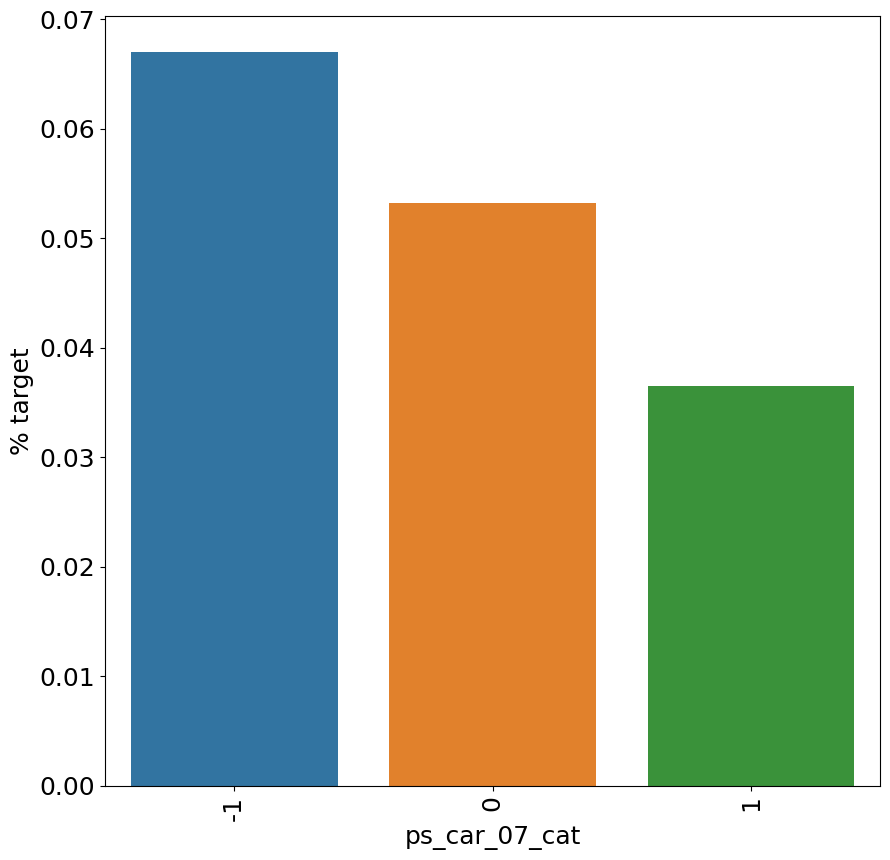

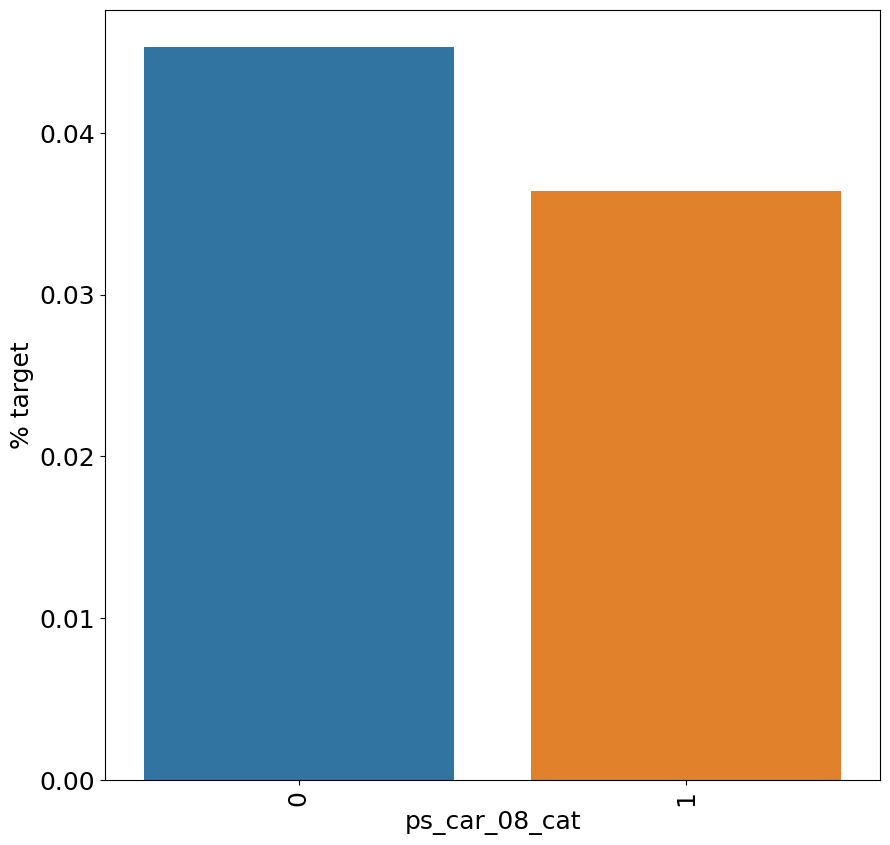

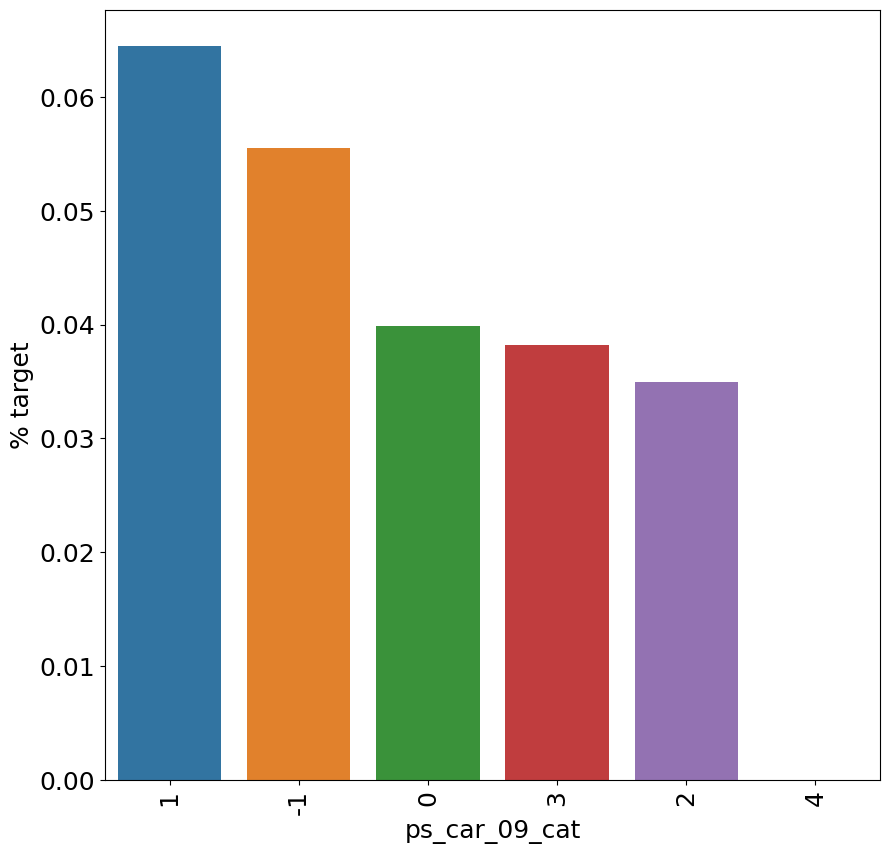

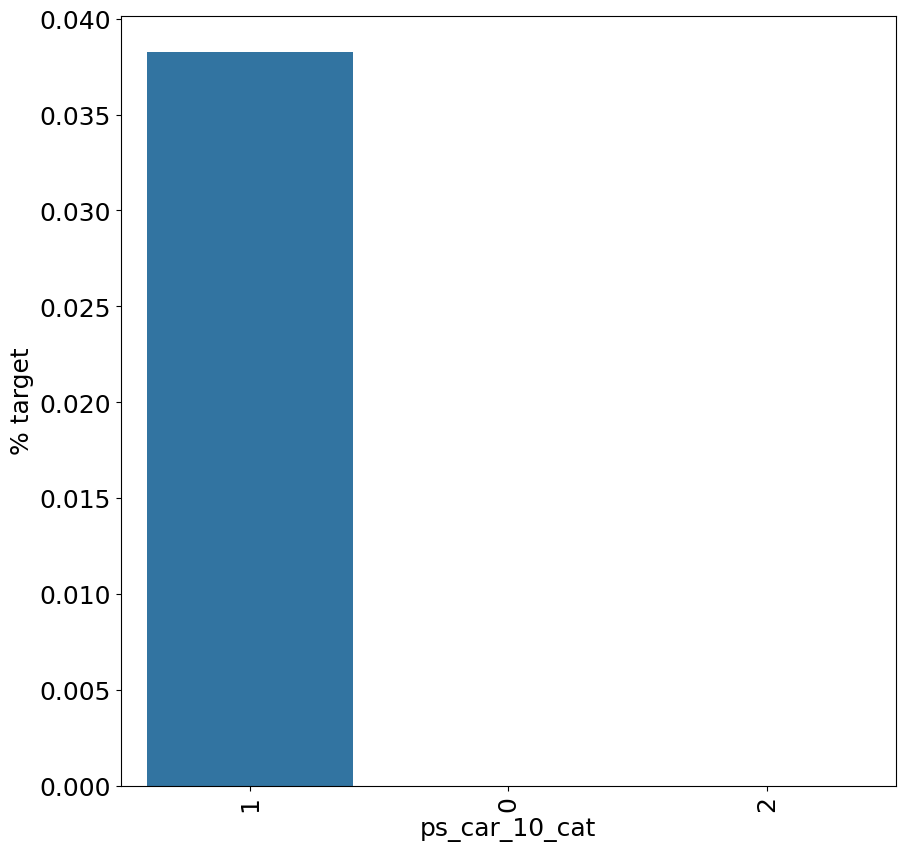

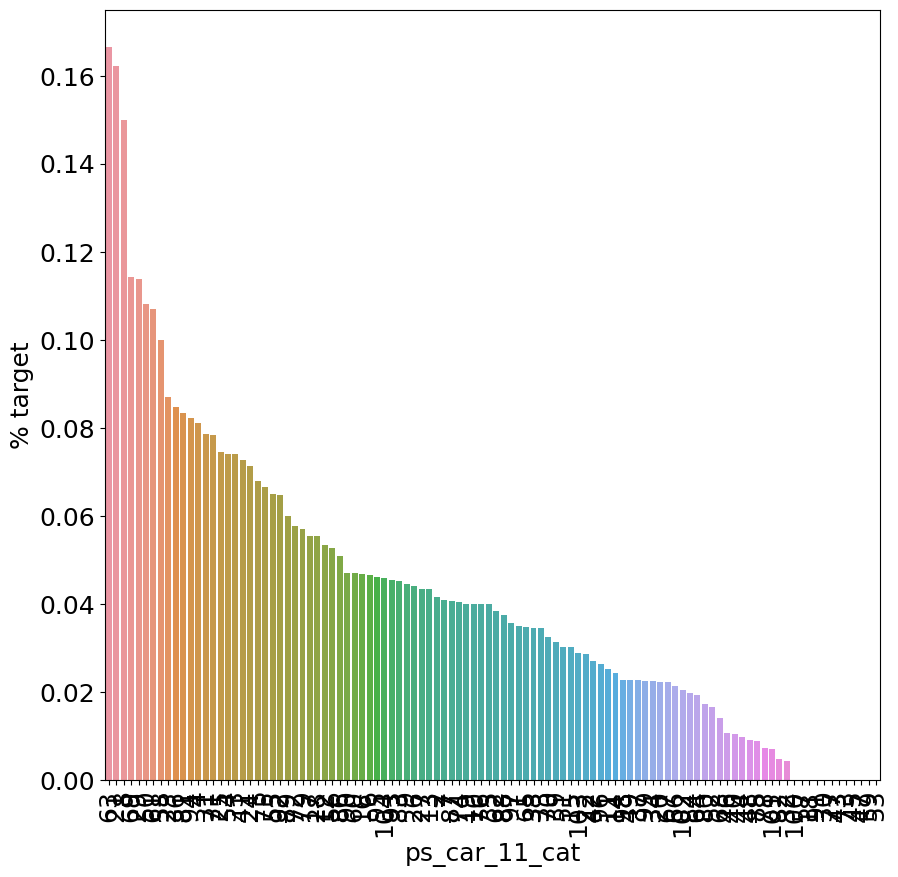

In [22]:
#Checking the distribution of minority class in different categories of categorical variables

v = list(MetaData[(MetaData.level == 'categorical') & (MetaData.keep)]['variable'].tolist())
v.remove('id')
target_column = 'target'

for f in v:
    fig, ax = plt.subplots(figsize=(10, 10))
    cat_perc = train.groupby(f, as_index=False)[target_column].mean()
    cat_perc.sort_values(by=target_column, ascending=False, inplace=True)
    x1 = f
    y1 = target_column
    sns.barplot(ax=ax, x=x1, y=y1, data=cat_perc, order=cat_perc[x1])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.xticks(rotation=90)
    plt.show()


In [23]:
#Findings:

#We can see in some variables, target data is distributed equally like - varaible - 25, 27
#We can't remove the missing value rows from data as they contains majority of target variable distribution in some variables
#like - variable - 23, 5

#Missing Value


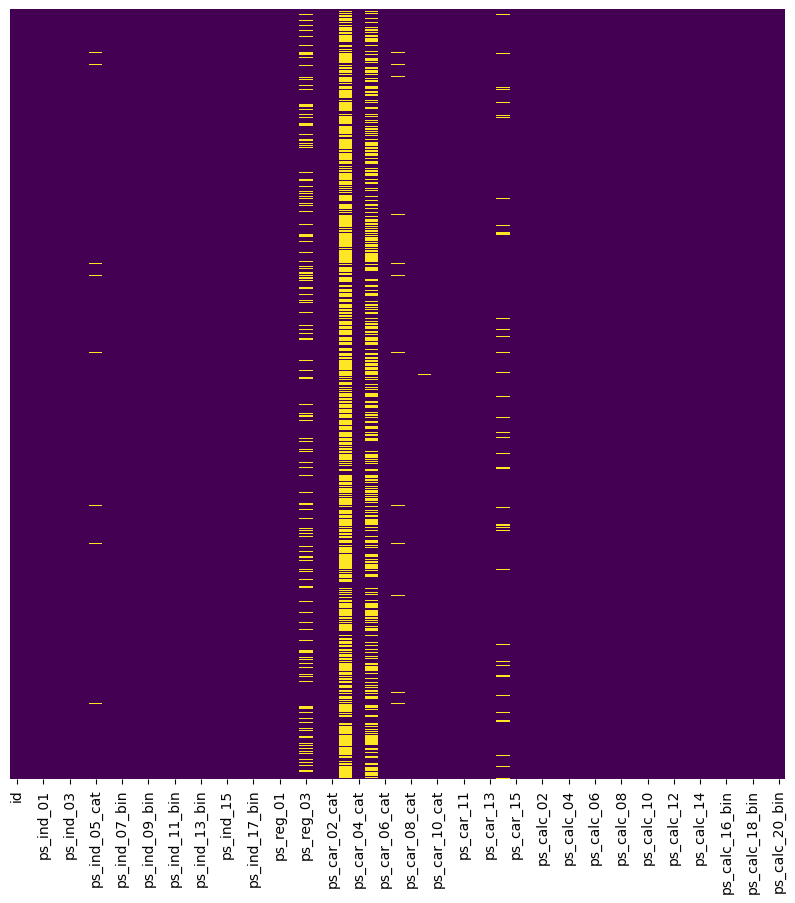

In [24]:
#Creating the heatmap for missing values using seaborn library

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train == -1, yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("MissingValueHeatMap.png", bbox_inches = "tight")

In [25]:
#Calculating the exact number and percentage of the missing values in all the variables

missing = []

for columns in train.columns:
    missing_count = train[train[columns] == -1][columns].count()
    if missing_count > 0:
        missing.append(columns)
        missings_perc = missing_count/train.shape[0]

        print('Variable %s has %i missing with %f percentage'%(columns, missing_count, missings_perc))

print('\nIn total, there are {} variables with missing values'.format(len(missing)))

Variable ps_ind_02_cat has 1 missing with 0.000092 percentage
Variable ps_ind_04_cat has 1 missing with 0.000092 percentage
Variable ps_ind_05_cat has 107 missing with 0.009854 percentage
Variable ps_reg_03 has 1951 missing with 0.179667 percentage
Variable ps_car_01_cat has 1 missing with 0.000092 percentage
Variable ps_car_03_cat has 7490 missing with 0.689750 percentage
Variable ps_car_05_cat has 4813 missing with 0.443227 percentage
Variable ps_car_07_cat has 209 missing with 0.019247 percentage
Variable ps_car_09_cat has 18 missing with 0.001658 percentage
Variable ps_car_14 has 764 missing with 0.070356 percentage

In total, there are 10 variables with missing values


In [ ]:
#Finding:

#We can remove variable ps_car_03_cat, ps_car_05_cat as they have high percentage of missing values
#For other variables, we can do missing value treatment by substituting mean and mode.
#Missing values in Categorical variables can be replaced by the mode value in that variable

In [26]:
#Updating the MetaData DataFrame for ps_car_03_cat and ps_car_05_cat (Keep = False)

In [27]:
MetaData.loc[MetaData['variable'] == 'ps_car_03_cat', 'keep'] = False
MetaData.loc[MetaData['variable'] == 'ps_car_05_cat', 'keep'] = False

In [ ]:
#For other variables, we can treat missing values

In [28]:
#Correlation between different types of variables
#Creating list of interval, categorical, binary and ordinal variables

for variable in MetaData.variable:
    IntervalVar = MetaData[MetaData.level=='interval']['variable']
    CategoricalVar = MetaData[MetaData.level=='categorical']['variable']
    BinaryVar = MetaData[MetaData.level=='binary']['variable']
    OrdinalVar = MetaData[MetaData.level=='ordinal']['variable']


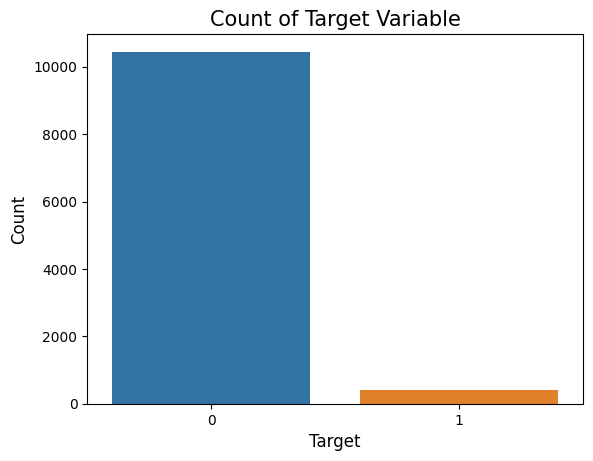

In [29]:
#Count of target variable.

sns.countplot(data=train, x='target')

plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Target Variable', fontsize=15)
plt.show()


In [30]:
#correlation
ind_col = [w for w in train.columns if 'ind' in w]
reg_col = [w for w in train.columns if 'reg' in w]
car_col = [w for w in train.columns if 'car' in w]

<Axes: >

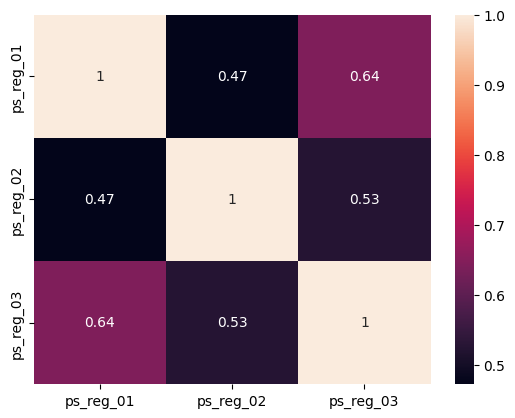

In [31]:
sns.heatmap(train[reg_col].corr(), annot= True)

In [ ]:
#Reg variable seems to somewhat related

In [32]:
#Removing variables that has high missing value count i.e ps_car_03_cat and ps_car_05_cat

train1 = train.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1)

In [33]:
#Checking dataframe after removing the 2 variables
#Number of variables at this point: 57

train1.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [34]:
#Importing sklearn library Imputer for imputing mean and mode in varaibles


from sklearn.impute import SimpleImputer

In [35]:
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']

# Imputing with the mean or mode----only non categorical variables

mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
train1['ps_reg_03'] = mean_imp.fit_transform(train1[['ps_reg_03']]).ravel()
train1['ps_car_12'] = mode_imp.fit_transform(train1[['ps_car_12']]).ravel()
train1['ps_car_14'] = mean_imp.fit_transform(train1[['ps_car_14']]).ravel()
train1['ps_car_11'] = mode_imp.fit_transform(train1[['ps_car_11']]).ravel()

In [36]:
#Imputing missing values in categorical variables by there Mode

missing = [ i for i in missing if not i in vars_to_drop]

for columns in missing:
    train1.loc[train1[columns] == -1, columns] = train1[columns].mode()[0]

In [37]:
#Checking the data frame after imputing missing values

train1.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [38]:
#Checking missing values in the data, if any.

missing = []

for columns in train1.columns:
    missing_count = train1[train1[columns] == -1][columns].count()
    if missing_count > 0:
        missing.append(columns)
        missings_perc = missing_count/train1.shape[0]

        print('Variable %s has %i missing with %f percentage'%(columns, missing_count, missings_perc))

print('\nIn total, there are {} variables with missing values'.format(len(missing)))


In total, there are 0 variables with missing values


In [39]:
#Checking dataframe shape

train1.shape

(10859, 57)

In [ ]:
#Handling Categorical Variables
#Creating dummy variables using get_dummies

In [40]:
#Creating list of categorical variables

cat_feat = MetaData[(MetaData.level == 'categorical') & (MetaData.keep == True)].variable

In [41]:
#Creating dummy variables of categorical variables except variable - ps_car_11_cat as it conatins more than 100 categories

v = MetaData[(MetaData.level == 'categorical') & (MetaData.keep)].variable
v = [w for w in list(v) if w!='id' and w!='ps_car_11_cat']

In [42]:
#Printing number of variables before and after dummification

print('Before dummification we have {} variables in train'.format(train1.shape[1]))
train2 = pd.get_dummies(train1, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train2.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 102 variables in train


In [ ]:
#Work till now
#Missing value treatment for all feature
#Dummification of categorical value excluding ps_car_11_cat

# Removing calculated variables

In [43]:
#Removing calculated variables since there correlation with target variable is non significant

column_excluding_calc  = [w for w in train2.columns if "calc" not in w]
train3 = train2[column_excluding_calc]

In [44]:
#Checking shape of data frame after removing calculated variables

train3.shape

(10859, 82)

# Outlier

In [45]:
#Detecting outlier

from collections import Counter

def detect_outlier(df):
    features = df.columns
    outliers  = []
    for i, feature in enumerate(features):
        if df[feature].dtype == 'float64':
            # Calculate Q1 (25th percentile of the data) for the given feature
            Q1 = np.percentile(df[feature], 25)
            # Calculate Q3 (75th percentile of the data) for the given feature
            Q3 = np.percentile(df[feature], 75)
            # Use the interquartile range to calculate an outlier step
            step = 1.5 * (Q3 - Q1)
            feature_outliers = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))]
            outliers.extend(list(feature_outliers.index.values))
            print('Feature: {}, outliers: {}\n'.format(feature, len(feature_outliers.index)))

    multi_feature_outliers = (Counter(outliers) - Counter(set(outliers))).keys()
    return multi_feature_outliers

In [46]:
#Printing the variables and number of outliers

outliers  = detect_outlier(train3.drop(['id', 'target'], axis = 1))

Feature: ps_reg_01, outliers: 0

Feature: ps_reg_02, outliers: 712

Feature: ps_reg_03, outliers: 663

Feature: ps_car_12, outliers: 285

Feature: ps_car_13, outliers: 519

Feature: ps_car_14, outliers: 580

Feature: ps_car_15, outliers: 518



In [47]:
#Removing outliers from the data

train4 = train3.drop(train3.index[list(outliers)]).reset_index(drop = True)

print('Number of outliers occur more than one feature: {}'.format(len(outliers)))
print('Shape of old data: {}'.format(train3.shape))
print('Shape of new data: {}'.format(train4.shape))

Number of outliers occur more than one feature: 804
Shape of old data: (10859, 82)
Shape of new data: (10055, 82)


In [ ]:
# We now have 82 variables

# Variable reduction

In [ ]:
#checking correlation of "REG" variables

In [48]:
ind_col = [w for w in train4.columns if 'ind' in w]
reg_col = [w for w in train4.columns if 'reg' in w]
car_col = [w for w in train4.columns if 'car' in w]

In [49]:
#Creating interaction variables for 'reg' variables since they are highly correlated
#Taking sum of reg variable

train4["sum_reg"] = train4["ps_reg_01"] + train4["ps_reg_02"] + train4["ps_reg_03"]

#Droping variables 'ps_reg_01 and ps_reg02

train5 = train4.drop(["ps_reg_01", "ps_reg_02"], axis = 1)

In [50]:
#Checking shape of dataframe after removal of correlated variables and addition of interaction variable

train5.shape

(10055, 81)

In [ ]:
#Removing low variance variables from the dataframe

In [51]:
#Checking the number of low variance variables in the data using VarianceThreshold from sklearn feature_selection

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=.01)
selector.fit(train5.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train5.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

25 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_13', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2']


In [52]:
#Dropping the low variance variables from the data and checking the shape of the final dataframe

train5 = train5.drop(list(v), axis = 1)
train5.shape

(10055, 56)

<Axes: >

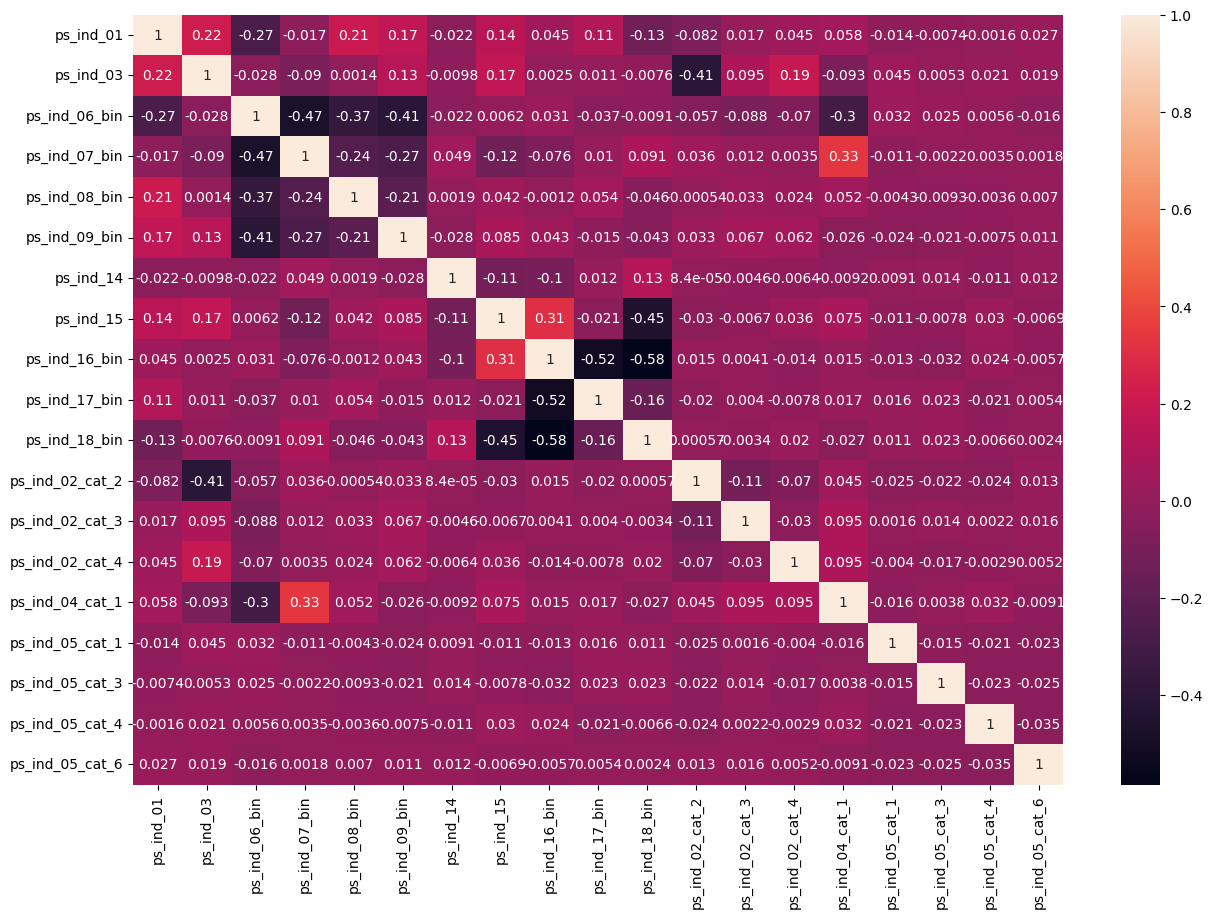

In [53]:
# Now working for correlation in "IND"
ind_col_new = [w for w in train5.columns if 'ind' in w]
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(train5[ind_col_new].corr(), annot= True)

In [54]:
# PS_ind_06_bin and PS_ind_07_bin high correlation - sp we drop PS_ind_06_bin
# ps_ind_16_bin corr with ps_ind_17_bin and ps_ind_18_bin so we drop ps_ind_16_bin
train5 = train5.drop(["ps_ind_06_bin", "ps_ind_16_bin"], axis = 1)

In [ ]:
# Now it's time to check CAR corrr..hope we get some luck

<Axes: >

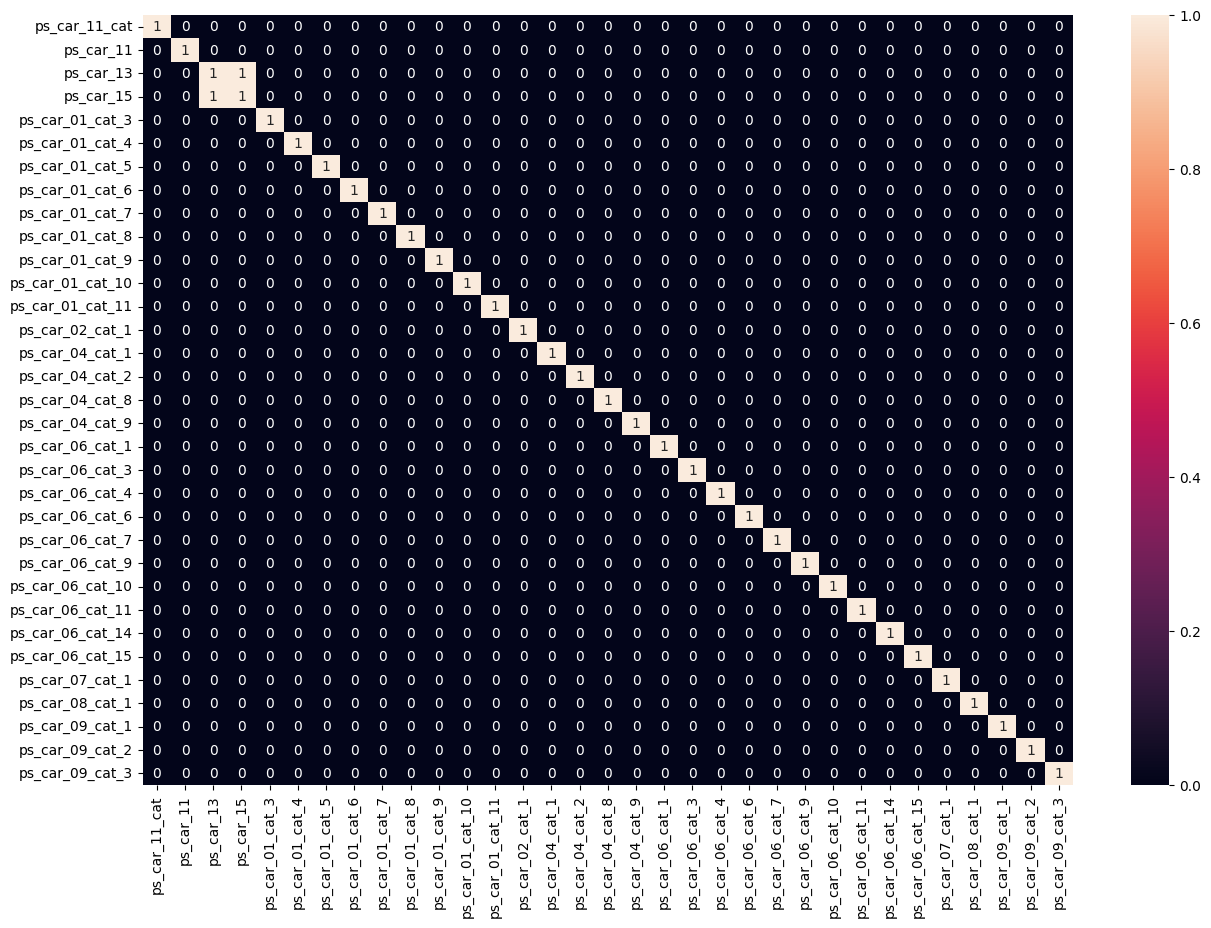

In [55]:
#Checking correlation of 'car' variables

car_col_new = [w for w in train5.columns if 'car' in w]
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(train5[car_col_new].corr() > 0.5, annot= True)

In [56]:
#Droping variable 'ps_car_15' as it is highly correlated with the variable 'ps_car_13' and checking the shape of resulting
#dataframe

train5 = train5.drop(["ps_car_15"], axis = 1)
train5.shape

(10055, 53)

# Test train split with handling imbalance class

In [ ]:
#Splitting the dataframe into test and train dataset for model building
#Split is done in 70:30 ratio

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#Splitting
X_train, X_test, y_train, y_test = train_test_split(train5.drop(['target', 'id'], axis=1),
                                                    train5['target'].astype(int), test_size=0.30, random_state=101)

In [58]:
df_train_temp = X_train
df_train_temp['target'] = y_train

In [59]:
df_minority = df_train_temp[df_train_temp.target==1]
df_minority.shape

(258, 52)

In [ ]:
#Downsampling

In [60]:
from sklearn.utils import resample
df_majority = df_train_temp[df_train_temp.target==0]
df_minority = df_train_temp[df_train_temp.target==1]

# Upsample minority class
df_majority_undersampled = resample(df_majority,
                                 replace=True,     # sample with replacement
                                 n_samples=13566*8,    # to match majority class 100% of majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Display new class counts
df_undersampled.target.value_counts()

0    108528
1       258
Name: target, dtype: int64

In [ ]:
#Upsampling

In [61]:
from sklearn.utils import resample
df_majority = df_undersampled[df_undersampled.target==0]
df_minority = df_undersampled[df_undersampled.target==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=13566*2,    # to match majority class 100% of majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.target.value_counts()

0    108528
1     27132
Name: target, dtype: int64

In [62]:
X_train_res = df_upsampled.drop('target', axis = 1)
y_train_res = df_upsampled.target


# Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
mms = StandardScaler()
X_train_res_scaled = mms.fit_transform(X_train_res)
#y_train_res_scaled = mms.fit_transform(y_train_res)

# Machine Learning Models

In [ ]:
#logistic_Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
lm = LogisticRegression()
logistic_model = lm.fit(X_train_res, y_train_res)
from sklearn.metrics import classification_report, confusion_matrix
predictions_LM = logistic_model.predict(X_test)
print('Classification Report Logistic Regression')
print(classification_report(y_test,predictions_LM))
print('Confusion Matrix Logistic Regression')
print(confusion_matrix(y_test,predictions_LM))

Classification Report Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2916
           1       0.08      0.03      0.04       101

    accuracy                           0.96      3017
   macro avg       0.52      0.51      0.51      3017
weighted avg       0.94      0.96      0.95      3017

Confusion Matrix Logistic Regression
[[2880   36]
 [  98    3]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Random forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=25, class_weight="balanced")
clf_RF.fit(X_train_res,y_train_res)
predictions_RF = clf_RF.predict(X_test)
print('Classification Report RandomForest Classifier')
print(confusion_matrix(y_test,predictions_RF))
print('\n Confusion Matrix RandomForest Classifier')
print(classification_report(y_test,predictions_RF))

Classification Report RandomForest Classifier
[[2916    0]
 [ 101    0]]

 Confusion Matrix RandomForest Classifier
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2916
           1       0.00      0.00      0.00       101

    accuracy                           0.97      3017
   macro avg       0.48      0.50      0.49      3017
weighted avg       0.93      0.97      0.95      3017



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=2)
clf_KNN.fit(X_train_res,y_train_res)
predictions_KNN = clf_KNN.predict(X_test)
print('Classification Report Nearest Neighbors')
print(confusion_matrix(y_test,predictions_KNN))
print('\nConfusion Matrix Nearest Neighbors')
print(classification_report(y_test,predictions_KNN))

Classification Report Nearest Neighbors
[[2839   77]
 [  98    3]]

Confusion Matrix Nearest Neighbors
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2916
           1       0.04      0.03      0.03       101

    accuracy                           0.94      3017
   macro avg       0.50      0.50      0.50      3017
weighted avg       0.94      0.94      0.94      3017



In [ ]:
#Randominzed logistic regression

In [68]:
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
logreg = LogisticRegression(class_weight='balanced')
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1]}
clf_RLR = RandomizedSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=3)
clf_RLR = clf_RLR.fit(X_train_res,y_train_res)
predictions_RLR = clf_RLR.predict(X_test)
print('Classification Report RandomizedSearchCV')
print(confusion_matrix(y_test,predictions_RLR))
print('\nConfusion Matrix RandomizedSearchCV')
print(classification_report(y_test,predictions_RLR))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classification Report RandomizedSearchCV
[[1854 1062]
 [  56   45]]

Confusion Matrix RandomizedSearchCV
              precision    recall  f1-score   support

           0       0.97      0.64      0.77      2916
           1       0.04      0.45      0.07       101

    accuracy                           0.63      3017
   macro avg       0.51      0.54      0.42      3017
weighted avg       0.94      0.63      0.75      3017



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#XGB

In [69]:
# custom objective function (similar to auc)

def gini(y, pred):
    g = np.asarray(np.c_[y, pred, np.arange(len(y)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(y) + 1) / 2.
    return gs / len(y)

def gini_xgb(pred, y):
    y = y.get_label()
    return 'gini', gini(y, pred) / gini(y, y)

def gini_lgb(preds, dtrain):
    y = list(dtrain.get_label())
    score = gini(y, preds) / gini(y, y)
    return 'gini', score, True

In [70]:
import xgboost as xgb
params = {'eta': 0.02, 'max_depth': 4, 'subsample': 0.9, 'colsample_bytree': 0.9,
          'objective': 'binary:logistic', 'eval_metric': 'auc', 'silent': True}
d_train = xgb.DMatrix(X_train_res, y_train_res)
d_valid = xgb.DMatrix(X_test, y_test)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
nrounds=2500
xgb_model = xgb.train(params, d_train, nrounds, watchlist, early_stopping_rounds=100,
                          feval=gini_xgb, maximize=True, verbose_eval=100)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[11:00:25] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-auc:0.66440	train-gini:0.17954	valid-auc:0.59377	valid-gini:0.18598


<ipython-input-69-c0c873eef9b5>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  g = np.asarray(np.c_[y, pred, np.arange(len(y)) ], dtype=np.float)


[100]	train-auc:0.84638	train-gini:0.69274	valid-auc:0.58599	valid-gini:0.17196
[103]	train-auc:0.84773	train-gini:0.69544	valid-auc:0.58750	valid-gini:0.17498


In [71]:
import xgboost as xgb
params = {'eta': 0.02, 'max_depth': 4, 'subsample': 0.9, 'colsample_bytree': 0.9,
          'objective': 'binary:logistic', 'eval_metric': 'auc', 'silent': True}
d_train = xgb.DMatrix(X_train_res, y_train_res)
d_valid = xgb.DMatrix(X_test, y_test)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
nrounds=2500
xgb_model_log = xgb.train(params, d_train, nrounds, watchlist, early_stopping_rounds=100,
                           maximize=True, verbose_eval=100)

[11:00:59] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-auc:0.66440	valid-auc:0.59377
[100]	train-auc:0.84638	valid-auc:0.58599
[103]	train-auc:0.84773	valid-auc:0.58750


In [ ]:
#Number of feature based on importance in Logistic Regression

In [74]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(logistic_model, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train_res.shape[1]))
n_features = sfm.transform(X_train_res).shape[1]
print('Number of features after selection: {}'.format(n_features))
#selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 51
Number of features after selection: 26


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
